In [1]:
import numpy as np
import itertools
import pickle

from scipy import stats, linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from sklearn.manifold import TSNE

from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors

In [2]:
def preprocess_embedding(z):
    """Pre-process embedding."""
    # Normalize coordinate system.
    gmm = GaussianMixture(n_components=1, covariance_type='spherical')
    gmm.fit(z)
    mu = gmm.means_[0]
    sigma = gmm.covariances_[0]
    z_norm = z - mu
    z_norm /= np.max(np.abs(z_norm))
    return z_norm

def calc_cosine_sim(a,b):
    return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

def calc_eucl_sim(a,b):
    return -np.linalg.norm(a-b)

In [3]:
vocab = list(pickle.load(open('nn/emb_text_dim_30_3.pickle','rb')).keys())
id_to_name = {i: key for i, key in enumerate(vocab)}
name_to_id = {key: i for i, key in enumerate(vocab)}
# eval df
df = pd.read_csv('word_similarity/mturk-771.csv') 

# k-NN for embeddings

In [39]:
# np.random.seed(23)
# sample_ids = np.random.choice(range(429),5)
sample_ids = np.random.choice(429,1)
sample_ids = [name_to_id['parrot']]

for i in range(4):
    for modality in ['text']:
        for emb_type in ['normal']:
            path = f'{emb_type}/emb_{modality}_dim_30_{i}.pickle'
            emb = pickle.load(open(path, 'rb'))            
            emb = preprocess_embedding(np.array(list(emb.values())))

            nbrs = NearestNeighbors(n_neighbors=11, algorithm='ball_tree').fit(emb)
            _, indices = nbrs.kneighbors(emb)

            print(modality, emb_type)
            for i in sample_ids:
                print(f'3-NN for {id_to_name[i]}: {" ".join([id_to_name[idx] for idx in indices[i][1:]])}')
            print('\n')

text normal
3-NN for parrot: worm butterfly owl scorpion raven snake frog ant woodpecker skull


text normal
3-NN for parrot: butterfly worm raven scorpion canary owl penguin shelf ant oyster


text normal
3-NN for parrot: worm raven owl bust kangaroo scorpion butterfly ostrich ant canary


text normal
3-NN for parrot: worm snail butterfly raven owl skunk snake ant goldfish vase




# Word Similarity Correlation (cosine sim) 

,similarity,emb_sim
similarity,1.000000,0.564286
emb_sim,0.564286,1.000000


,word1,word2,similarity,emb_sim
14,shirt,tiger,0.209367,0.010212
10,helmet,scale,0.278418,-0.081475
3,ball,egg,0.348240,0.093870
13,motorcycle,tank,0.411992,0.295775
1,animal,worm,0.548387,0.309276
0,aircraft,balloon,0.578541,0.663956
2,apple,orange,0.701262,0.421594
11,lion,tiger,0.718794,0.616070
8,drum,piano,0.736325,0.591214
12,maple,tree,0.772849,0.594315


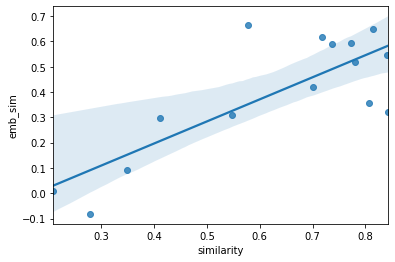

,similarity,emb_sim
similarity,1.000000,0.585714
emb_sim,0.585714,1.000000


,word1,word2,similarity,emb_sim
14,shirt,tiger,0.209367,-0.003799
10,helmet,scale,0.278418,0.065424
3,ball,egg,0.348240,0.249290
13,motorcycle,tank,0.411992,0.347650
1,animal,worm,0.548387,0.334830
0,aircraft,balloon,0.578541,0.484244
2,apple,orange,0.701262,0.640211
11,lion,tiger,0.718794,0.684291
8,drum,piano,0.736325,0.587854
12,maple,tree,0.772849,0.532854


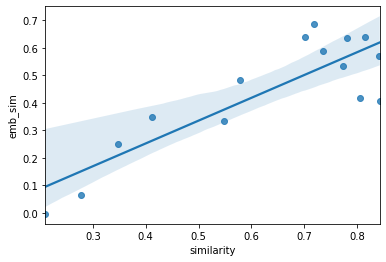

,similarity,emb_sim
similarity,1.000000,0.771429
emb_sim,0.771429,1.000000


,word1,word2,similarity,emb_sim
14,shirt,tiger,0.209367,0.019891
10,helmet,scale,0.278418,-0.273707
3,ball,egg,0.348240,0.069959
13,motorcycle,tank,0.411992,0.473545
1,animal,worm,0.548387,0.280323
0,aircraft,balloon,0.578541,0.559321
2,apple,orange,0.701262,0.670931
11,lion,tiger,0.718794,0.786239
8,drum,piano,0.736325,0.701283
12,maple,tree,0.772849,0.440247


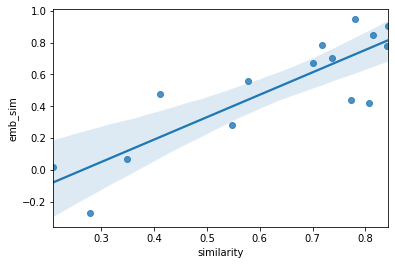

,similarity,emb_sim
similarity,1.000000,0.757143
emb_sim,0.757143,1.000000


,word1,word2,similarity,emb_sim
14,shirt,tiger,0.209367,-0.068199
10,helmet,scale,0.278418,-0.091104
3,ball,egg,0.348240,0.024273
13,motorcycle,tank,0.411992,0.384208
1,animal,worm,0.548387,0.205931
0,aircraft,balloon,0.578541,0.420884
2,apple,orange,0.701262,0.603041
11,lion,tiger,0.718794,0.686892
8,drum,piano,0.736325,0.719590
12,maple,tree,0.772849,0.131286


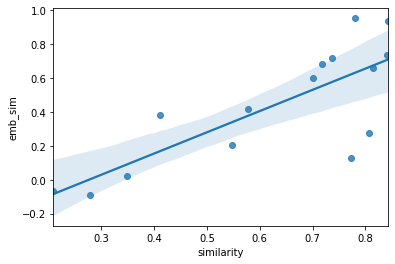

In [13]:
for modality in ['text', 'image']:
    for emb_type in ['nn', 'normal']:
        path = f'{emb_type}/emb_{modality}_dim_30_3.pickle'
        emb = pickle.load(open(path, 'rb'))            
        emb = preprocess_embedding(np.array(list(emb.values())))

        indices = []

        for i in range(df.shape[0]):
            if (df.loc[i,'word1'] in vocab) and (df.loc[i,'word2'] in vocab):
                indices.append(i)

        df_sim = df.loc[indices,['word1','word2','similarity']].reset_index(drop=True)
        df_sim['similarity'] = df_sim['similarity']/df['similarity'].max()

        emb_sim = []

        for i in range(df_sim.shape[0]):
            word1 = df_sim.loc[i,'word1']
            word2 = df_sim.loc[i,'word2']
            word1_emb = emb[name_to_id[word1],:]
            word2_emb = emb[name_to_id[word2],:]
            emb_sim.append(calc_cosine_sim(word1_emb, word2_emb))
#             emb_sim.append(calc_eucl_sim(word1_emb, word2_emb))

        df_sim['emb_sim'] = emb_sim
        df_sim = df_sim.sort_values(by='similarity')
        display(df_sim.corr(method='spearman'), df_sim)
        sns.regplot(df_sim['similarity'], df_sim['emb_sim'])
        plt.show()

In [15]:
df

,Unnamed: 0,word1,word2,similarity
0,0,access,gateway,3.791667
1,1,account,explanation,2.000000
2,2,account,invoice,3.750000
3,3,account,statement,3.681818
4,4,acoustic,remedy,1.227273
...,...,...,...,...
766,766,ticket,writing,2.375000
767,767,victory,watch,1.553191
768,768,washer,worker,2.909091
769,769,wife,woman,3.884615


,similarity,emb_sim
similarity,1.000000,0.371429
emb_sim,0.371429,1.000000


,word1,word2,similarity,emb_sim
14,shirt,tiger,1.038462,0.508332
10,helmet,scale,1.380952,0.331035
3,ball,egg,1.727273,0.423209
13,motorcycle,tank,2.043478,0.511647
1,animal,worm,2.720000,0.600048
0,aircraft,balloon,2.869565,0.591412
2,apple,orange,3.478261,0.648641
11,lion,tiger,3.565217,0.668092
8,drum,piano,3.652174,0.725671
12,maple,tree,3.833333,0.661835


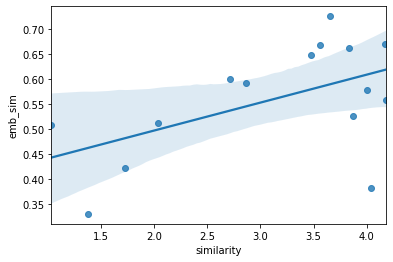

,similarity,emb_sim
similarity,1.000000,0.527774
emb_sim,0.527774,1.000000


,word1,word2,similarity,emb_sim
15,afternoon,substance,1.000000,0.376461
744,shirt,tiger,1.038462,0.508332
111,beach,chain,1.047619,0.556076
733,scandal,week,1.086957,0.642800
325,cup,son,1.086957,0.374671
...,...,...,...,...
71,ass,donkey,4.850000,0.597309
242,child,kid,4.857143,0.669637
715,quiet,silence,4.909091,0.741428
450,film,movie,4.912281,0.948092


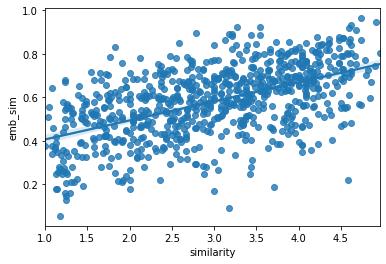

In [16]:
glove = {}
with open('./word_similarity/glove.6B.50d.txt', 'r') as r: 
    for line in r.readlines():
        vals = line.split()
        glove[vals[0]] = [float(val) for val in vals[1:]]        
    
vocab = list(glove.keys())

id_to_name = {i: key for i, key in enumerate(vocab)}
name_to_id = {key: i for i, key in enumerate(vocab)}

emb = preprocess_embedding(np.array(list(glove.values())))

ind_intersect = indices
ind_all = []

for i in range(df.shape[0]):
    if (df.loc[i,'word1'] in vocab) and (df.loc[i,'word2'] in vocab):
        ind_all.append(i)

for ind in [ind_intersect, ind_all]:
    df_sim = df.loc[ind,['word1','word2','similarity']].reset_index(drop=True)
    df_sim['similarity'] = df_sim['similarity']

    emb_sim = []

    for i in range(df_sim.shape[0]):
        word1 = df_sim.loc[i,'word1']
        word2 = df_sim.loc[i,'word2']
        word1_emb = emb[name_to_id[word1],:]
        word2_emb = emb[name_to_id[word2],:]
        emb_sim.append(calc_cosine_sim(word1_emb, word2_emb))

    df_sim['emb_sim'] = emb_sim
    df_sim = df_sim.sort_values(by='similarity')
    display(df_sim.corr(method='spearman'), df_sim)
    sns.regplot(df_sim['similarity'], df_sim['emb_sim'])
    plt.show()

# 2D Visualization

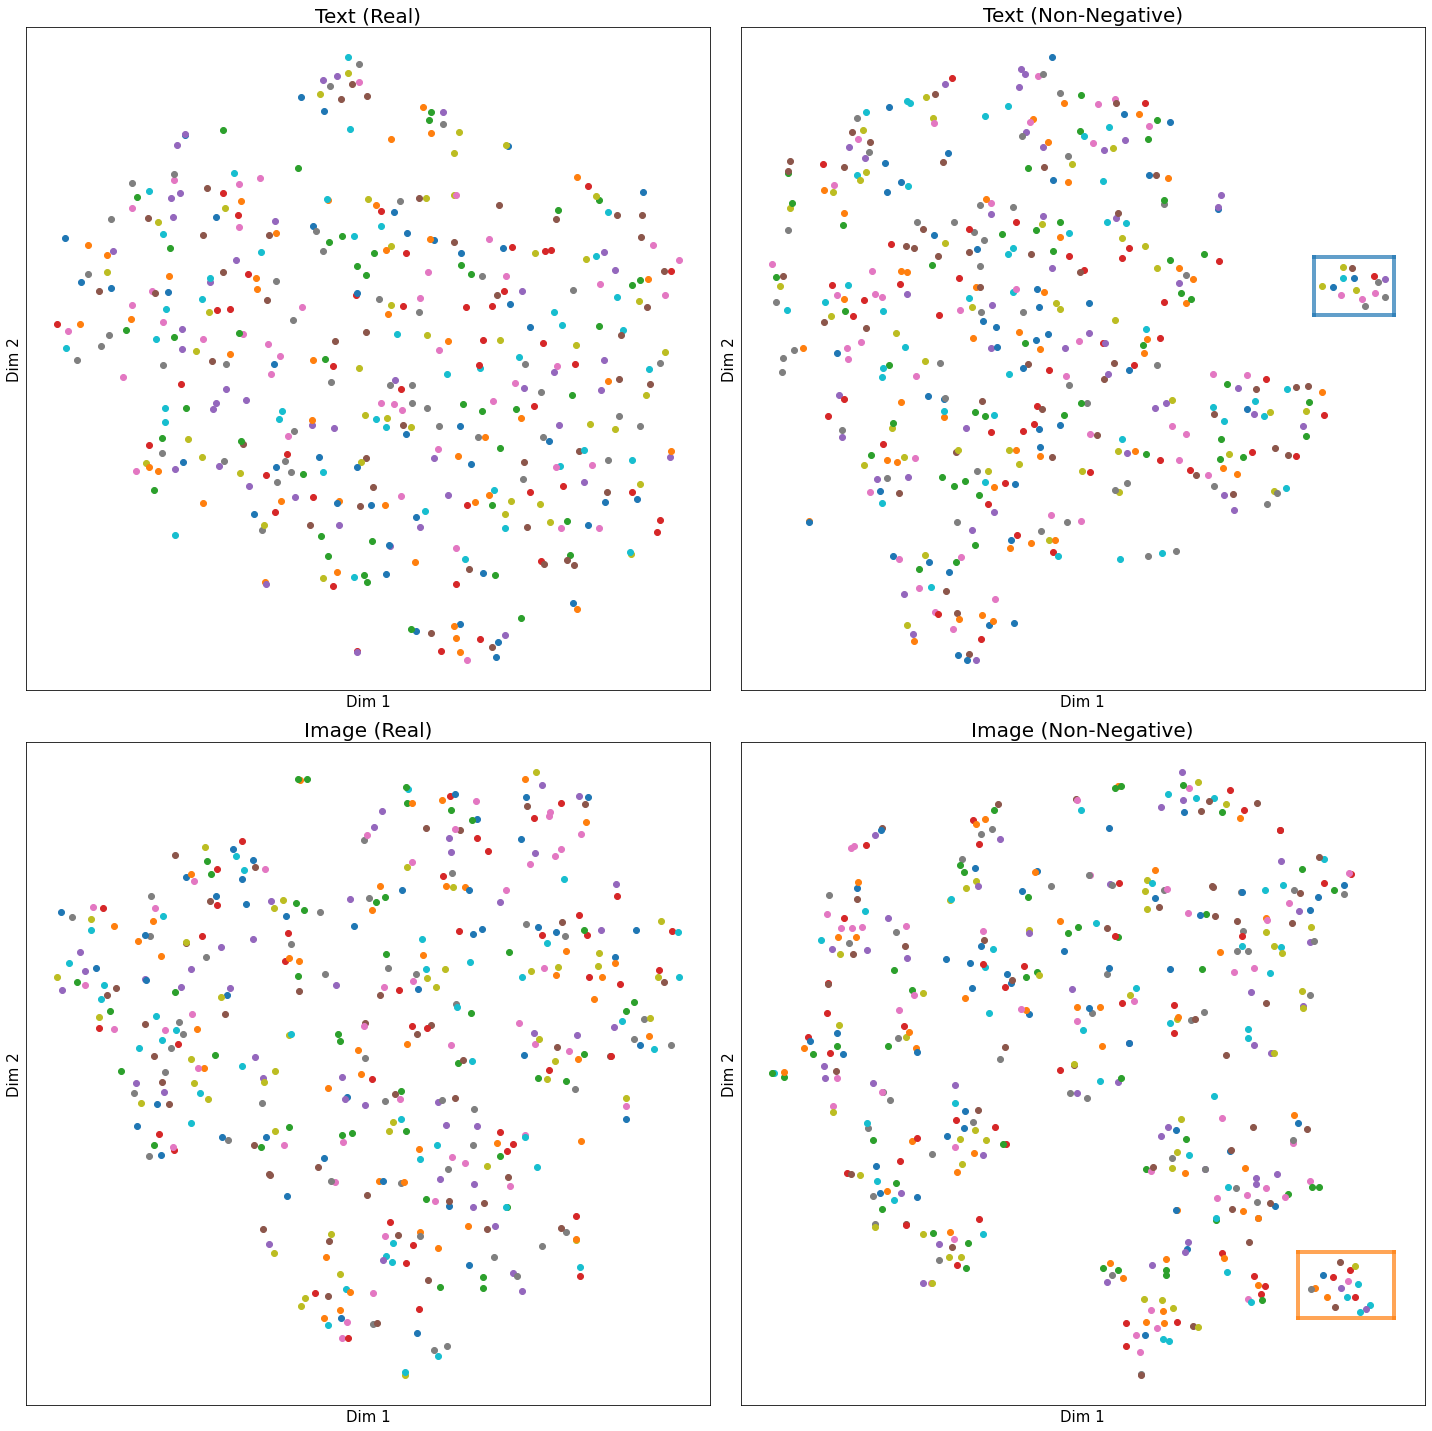

In [14]:
FIGSIZE = (20,20)
FONTSIZE = 24

fig, axes = plt.subplots(2, 2, figsize=FIGSIZE,sharey=False)
emb_dict = {}

for i, modality in enumerate(['text', 'image']):      
    for j, emb_type in enumerate(['normal','nn']):
        path = f'{emb_type}/emb_{modality}_dim_30_3.pickle'
        emb = pickle.load(open(path, 'rb'))            
        emb = np.array(list(emb.values()))

        tsne = TSNE(metric='cosine', init='pca', random_state=0)
        emb_tsne = preprocess_embedding(tsne.fit_transform(emb))
        
        # save emb
        emb_dict[f'{modality} {emb_type}'] = emb_tsne

        if emb_type == 'nn':
            if modality == 'text':
                xmin, xmax = 0.78, 1.0
                ymin, ymax = 0.08, 0.26

            if modality == 'image':
                xmin, xmax = 0.65, 0.95
                ymin, ymax = -0.80, -0.60

            axes[i,j].plot([xmin,xmin], [ymin,ymax], ls='-', color=f'C{i}', linewidth=4, alpha=0.7)
            axes[i,j].plot([xmax,xmax], [ymin,ymax], ls='-', color=f'C{i}', linewidth=4, alpha=0.7)
            axes[i,j].plot([xmin,xmax], [ymax,ymax], ls='-', color=f'C{i}', linewidth=4, alpha=0.7)
            axes[i,j].plot([xmin,xmax], [ymin,ymin], ls='-', color=f'C{i}', linewidth=4, alpha=0.7)
        
        ### 2D EMB
        for idx in range(429):
            axes[i,j].scatter(*emb_tsne[idx,:])
        
        axes[i,j].set_title(modality+emb_type, fontsize=20)
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])
        axes[i,j].set_xlabel('Dim 1', fontsize=15)
        axes[i,j].set_ylabel('Dim 2', fontsize=15)
        
axes[0,0].set_title("Text (Real)", fontsize=20)
axes[0,1].set_title("Text (Non-Negative)", fontsize=20)
axes[1,0].set_title("Image (Real)", fontsize=20)
axes[1,1].set_title("Image (Non-Negative)", fontsize=20)
        
plt.tight_layout(pad=1.12, h_pad=None, w_pad=None, rect=None)
plt.savefig(f'./assets/emb_plot_nn_real.pdf')
plt.show()

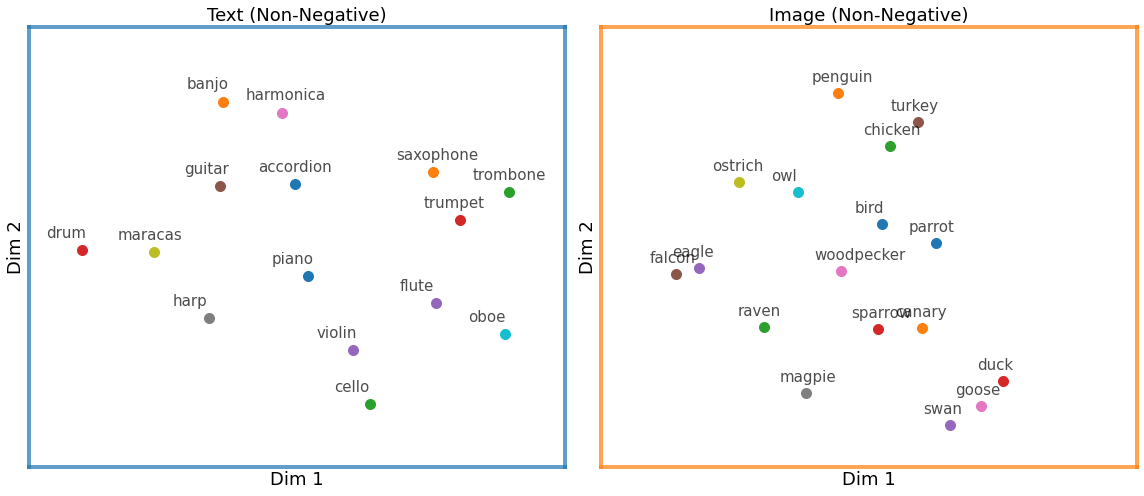

In [18]:
### 2D EMB

FIGSIZE = (16,7)
FONTSIZE = 24

fig, axes = plt.subplots(1, 2, figsize=FIGSIZE,sharey=False)

emb_type = 'nn'

for i, modality in enumerate(['text', 'image']):
    emb_tsne = emb_dict[f'{modality} {emb_type}']

    if modality == 'text':
        xmin, xmax = 0.78, 1.0
        ymin, ymax = 0.08, 0.26

    if modality == 'image':
        xmin, xmax = 0.65, 0.95
        ymin, ymax = -0.80, -0.60

    cond_x_min = (xmin <= emb_tsne[:,0])
    cond_x_max = (emb_tsne[:,0] <= xmax)
    cond_y_min = (ymin <= emb_tsne[:,1])
    cond_y_max = (emb_tsne[:,1] <= ymax)

    target_indices = []

    for idx, (ix, jx, iy, jy) in enumerate(zip(cond_x_min, cond_x_max, cond_y_min, cond_y_max)):
        if ix & jx & iy & jy:
            target_indices.append(idx)
    
    for idx in target_indices:
        axes[i].scatter(*emb_tsne[idx,:], s=100)
        axes[i].annotate(id_to_name[idx], (emb_tsne[idx, 0]-0.015, emb_tsne[idx, 1]+0.005), fontsize=15, alpha=0.7)
    axes[i].set_xticks([])
    axes[i].set_xlim([xmin, xmax])
    axes[i].set_ylim([ymin, ymax])
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_xlabel('Dim 1',fontsize=18)
    axes[i].set_ylabel('Dim 2',fontsize=18)
    axes[i].tick_params(axis='both', which='major', labelsize=15) 
    
    colors = ['C0','C1']
    width = 4
    alpha = 0.7
    for loc in ['top', 'bottom','right','left']: 
        axes[i].spines[loc].set_color(colors[i])
        axes[i].spines[loc].set_linewidth(width)
        axes[i].spines[loc].set_alpha(alpha)
        
axes[0].set_title('Text (Non-Negative)', fontsize=18)
axes[1].set_title('Image (Non-Negative)', fontsize=18)

plt.tight_layout(pad=1.12, h_pad=None, w_pad=None, rect=None)
plt.savefig(f'./assets/emb_plot_nn_zoomed.pdf')
plt.show()

# Characterising Embeddings with GMM and BIC
- Higher number of clusters -> Easier to Align
- Achieved with non-negativity in both modalities

normal text, argmin(bic): 4, min(bic): 30794.894260809575
normal text, argmin(bic): 7, min(bic): 30717.4557912903
normal text, argmin(bic): 5, min(bic): 30697.189636695202
normal text, argmin(bic): 5, min(bic): 30784.842734478814
nn text, argmin(bic): 6, min(bic): 26025.175500385034
nn text, argmin(bic): 9, min(bic): 25917.2176017938
nn text, argmin(bic): 9, min(bic): 26105.912046131252
nn text, argmin(bic): 12, min(bic): 26002.724578106452
normal image, argmin(bic): 8, min(bic): 32496.077075357134
normal image, argmin(bic): 11, min(bic): 32387.15299780666
normal image, argmin(bic): 7, min(bic): 32176.548413441385
normal image, argmin(bic): 8, min(bic): 32633.54148112269
nn image, argmin(bic): 27, min(bic): 26423.764842884506
nn image, argmin(bic): 30, min(bic): 26064.897139497476
nn image, argmin(bic): 18, min(bic): 26451.972619902994
nn image, argmin(bic): 24, min(bic): 26314.128352941567


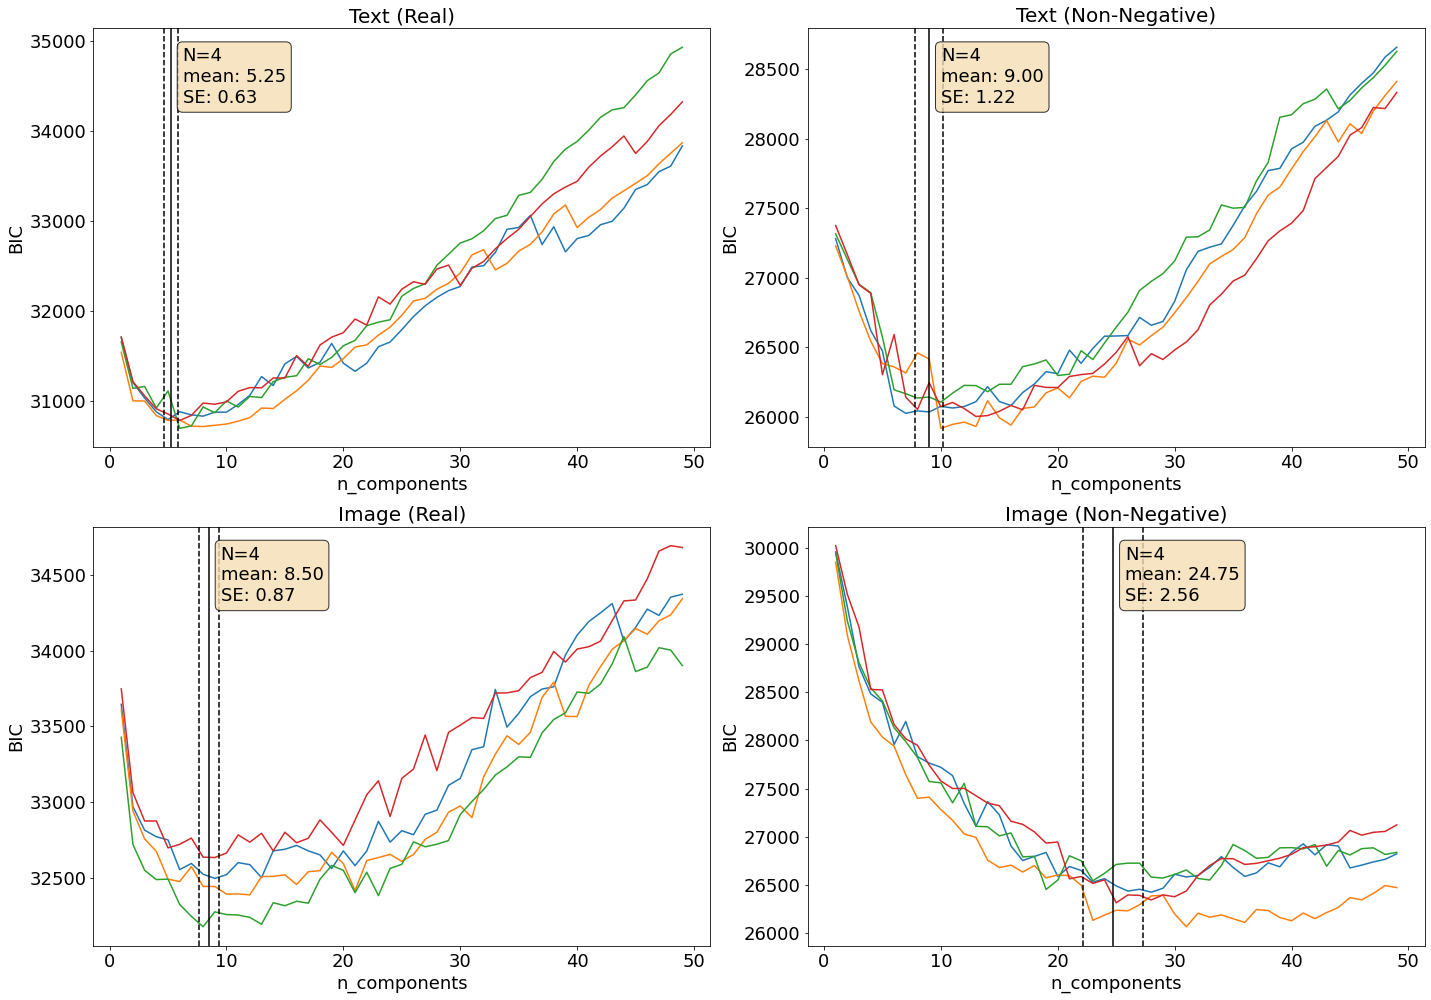

In [19]:
fig, axes = plt.subplots(2,2,figsize=(20,14))

for i, modality in enumerate(['text', 'image']):
    for j, emb_type in enumerate(['normal', 'nn']):
        bic_argmin = []
        bic_max = 0
        for i_ind in range(4):
            path = f'{emb_type}/emb_{modality}_dim_30_{i_ind}.pickle'
            emb = pickle.load(open(path, 'rb'))
            X = np.array(list(emb.values()))
            n_components = np.arange(1, 50)
            models = [GaussianMixture(n, covariance_type='spherical', random_state=0).fit(X) for n in n_components]
            bic = [m.bic(X) for m in models]
            bic_argmin.append(np.argmin(bic))
            print(f'{emb_type} {modality}, argmin(bic): {np.argmin(bic)}, min(bic): {min(bic)}')
            axes[i,j].plot(n_components, bic, label='BIC')
            
            if np.max(bic) > bic_max:
                bic_max = np.max(bic)
        
        mean = np.mean(bic_argmin)
        sigma = stats.sem(bic_argmin)
        
        axes[i,j].axvline(x=mean, color='black')
        axes[i,j].axvline(x=mean-sigma,ls='--', color='black')
        axes[i,j].axvline(x=mean+sigma, ls='--', color='black')  
        axes[i,j].set_xlabel('n_components', fontsize=18)
        axes[i,j].set_ylabel('BIC', fontsize=18)
        
        N = 4
        textstr = '\n'.join((
            r'N=%.1d' % (N, ),
            r'mean: %.2f' % (mean, ),
            r'SE: %.2f' % (sigma, )))
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)      
        axes[i,j].text(mean+1, bic_max, textstr, fontsize=18, verticalalignment='top', bbox=props)
        axes[i,j].tick_params(axis='both', which='major', labelsize=18)
        
axes[0,0].set_title('Text (Real)', fontsize=20)
axes[0,1].set_title('Text (Non-Negative)', fontsize=20);
axes[1,0].set_title('Image (Real)', fontsize=20);
axes[1,1].set_title('Image (Non-Negative)', fontsize=20);

plt.tight_layout(pad=1.12, h_pad=None, w_pad=None, rect=None)
plt.savefig(f'./assets/GMM_bic.pdf')
plt.show()